In [41]:
using PyPlot
using DataFrames
using CSV
import Statistics

In [42]:
include("./src/loop_function.jl")
include("./src/tmat.jl")
include("./src/tmat_up_to_nlo.jl")
include("./src/par.jl")
include("./src/subtraction_cons.jl")

subtraction_cons_tuple (generic function with 1 method)

In [43]:
import PyCall
iminuit = PyCall.pyimport("iminuit");

In [44]:
par_phy_channel = par_physical_channel()
# par_phy_channel[:decons] = 106.0

Dict{Symbol, Any} with 5 entries:
  :threshold  => [1431.95, 1328.94, 1327.62, 1437.22, 1337.02, 1250.66]
  :mch        => [(493.68, 938.272), (139.57, 1189.37), (134.977, 1192.64), (49…
  :mB         => [938.272, 939.565, 1115.68, 1197.45, 1192.64, 1189.37]
  :meson_mass => (139.57, 134.977, 139.57, 497.65, 493.68)
  :decons     => 100.69

In [46]:
function plot_cross_section(ax, df; kwargs...)
    mKbarn = 1437.22
    ax.errorbar(df.Ecm, df.sigma, yerr=df.dsigma, fmt="s"; kwargs...)
    ax.set_ylim(0, maximum(df.sigma + df.dsigma))
    ax.vlines(mKbarn, 0, maximum(df.sigma + df.dsigma), ls="--", color="k")
    ax.legend()
end;

In [47]:
b = (-0.664609603537589, 0.062434962905761365, -0.35384103271852047)
d = (-0.3595489872519527, 0.020386885826743775, -0.1405760338940346, -0.5771420439532574)
CC = lecs_cij()
DD = lec_bi(par_phy_channel, b)
# LL = lec_di(d)
qmax_nlo = 709.8420762525412
mu=630e0
anlo_phy_channel = Tuple(subtraction_cons(par_phy_channel[:mch][i], mu, qmax_nlo) for i in 1:6);

In [48]:
data_path = "./lambda1405_data/lambda1405_data/";

Kmp_to_Kbar0n = CSV.read(data_path * "Kmp_to_Kbar0n.csv", DataFrame)
Kmp_to_Kmp = CSV.read(data_path * "Kmp_to_Kmp.csv", DataFrame)
Kmp_to_Lampi0 = CSV.read(data_path * "Kmp_to_Lampi0.csv", DataFrame)
Kmp_to_Sig0pi0 = CSV.read(data_path * "Kmp_to_Sig0pi0.csv", DataFrame)
Kmp_to_Sigmpip = CSV.read(data_path * "Kmp_to_Sigmpip.csv", DataFrame)
Kmp_to_Sigppim = CSV.read(data_path * "Kmp_to_Sigppim.csv", DataFrame);

mKbarn = 1437.22
# filter!(df -> df.Ecm >= mKbarn, Kmp_to_Kbar0n)
# filter!(df -> df.Ecm >= mKbarn, Kmp_to_Kmp)
# filter!(df -> df.Ecm >= mKbarn, Kmp_to_Lampi0)
# filter!(df -> df.Ecm >= mKbarn, Kmp_to_Sig0pi0)
# filter!(df -> df.Ecm >= mKbarn, Kmp_to_Sigmpip)
# filter!(df -> df.Ecm >= mKbarn, Kmp_to_Sigppim);


# filter!(df -> 1500>= df.Ecm >= mKbarn, Kmp_to_Kbar0n)
# filter!(df -> 1500>=df.Ecm >= mKbarn, Kmp_to_Kmp)
# filter!(df -> 1500>=df.Ecm >= mKbarn, Kmp_to_Lampi0)
# filter!(df -> 1500>=df.Ecm >= mKbarn, Kmp_to_Sig0pi0)
# filter!(df -> 1500>=df.Ecm >= mKbarn, Kmp_to_Sigmpip)
# filter!(df -> 1500>=df.Ecm >= mKbarn, Kmp_to_Sigppim);

w1 = Kmp_to_Kmp.Ecm
w2 = Kmp_to_Sigppim.Ecm
w3 = Kmp_to_Sig0pi0.Ecm
w4 = Kmp_to_Kbar0n.Ecm
w5 = Kmp_to_Sigmpip.Ecm
w6 = Kmp_to_Lampi0.Ecm

s1 = Kmp_to_Kmp.sigma
s2 = Kmp_to_Sigppim.sigma
s3 = Kmp_to_Sig0pi0.sigma
s4 = Kmp_to_Kbar0n.sigma
s5 = Kmp_to_Sigmpip.sigma
s6 = Kmp_to_Lampi0.sigma

ds1 = Kmp_to_Kmp.dsigma
ds2 = Kmp_to_Sigppim.dsigma
ds3 = Kmp_to_Sig0pi0.dsigma
ds4 = Kmp_to_Kbar0n.dsigma
ds5 = Kmp_to_Sigmpip.dsigma
ds6 = Kmp_to_Lampi0.dsigma;

ww = push!([], w1..., w2..., w3..., w4..., w5..., w6...)
ss = push!([], s1..., s2..., s3..., s4..., s5..., s6...)
dss = push!([], ds1..., ds2..., ds3..., ds4..., ds5..., ds6...);
len = length(ww)

350

In [49]:
function cost_fun(free_par)

    d = free_par[1:4]
    lam = free_par[5]
    a = Tuple(subtraction_cons(par_phy_channel[:mch][i], mu, lam) for i in 1:6)
    LLL = lec_di(d)
   

    ss11 = map(x -> dist_lo(x, par_phy_channel, CC, a, :ch11), w1)
    ss21 = map(x -> dist_lo(x, par_phy_channel, CC, a, :ch12), w2)
    ss31 = map(x -> dist_lo(x, par_phy_channel, CC, a, :ch13), w3)
    ss41 = map(x -> dist_lo(x, par_phy_channel, CC, a, :ch14), w4)
    ss51 = map(x -> dist_lo(x, par_phy_channel, CC, a, :ch15), w5)
    ss61 = map(x -> dist_lo(x, par_phy_channel, CC, a, :ch16), w6)
    ss_th1 = push!([], ss11..., ss21..., ss31..., ss41..., ss51..., ss61...)
    y1 = (ss_th1 - ss) ./ dss

   

    ss1 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LLL, a, :ch11), w1)
    ss2 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LLL, a, :ch12), w2)
    ss3 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LLL, a, :ch13), w3)
    ss4 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LLL, a, :ch14), w4)
    ss5 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LLL, a, :ch15), w5)
    ss6 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LLL, a, :ch16), w6)
    ss_th = push!([], ss1..., ss2..., ss3..., ss4..., ss5..., ss6...)
    y = (ss_th - ss) ./ dss
    return y1' * y1 + y' * y
end

cost_fun (generic function with 1 method)

In [50]:
free_par = [-0.5051053018469929, 0.04552, -0.035698599511610675, -0.2958402581978185, 669.058485914272]#[-0.3595489872519527, 0.020386885826743775, -0.1405760338940346, -0.5771420439532574,560.8420762525412]
name = [:d1, :d2, :d3, :d4, :lam]
fit = iminuit.Minuit(x -> cost_fun(x), free_par, name=name)
# fit.limits = [(-1, 1), (-1, 1), (-1, 1), (-1, 1), (620e0, 1200e0)]
# fit.fixed = true
# fit.fixed[5] = true
# fit.fixed[2]=true
fit

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,d1,-0.505,0.005,,,,,
1,d2,45.5e-3,0.5e-3,,,,,
2,d3,-35.7e-3,0.4e-3,,,,,
3,d4,-0.2958,0.0030,,,,,
4,lam,669,7,,,,,


In [51]:
fit.migrad()
# fit.minos()
println("The reduced χ^2 is $(fit.fval / (2*len - fit.nfit))")
fit

The reduced χ^2 is 57.93289166036681


PyObject <FMin algorithm='Migrad' edm=1.8083946092196864e-05 edm_goal=0.0002 errordef=1.0 fval=40263.359703954935 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=217 ngrad=0 reduced_chi2=nan time=18.864368480979465>
(Param(number=0, name='d1', value=-0.4895122968394742, error=0.003982199836996755, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='d2', value=-0.027875498354732308, error=0.001349393596533945, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='d3', value=0.2808662212875353, error=0.01202647515625746, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=3, name='d4', value=-0.5463951217798612, error=0.0022583530518287057, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=4, name='lam', value=604.703604983813, error=4.002405036570458, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
[[ 1.58579155e-05 -6.70327391e-07 -3.43012950e-05  4.83101332e-06
   7.82280558e-03]
 [-6.70327391e-07  1.82086308e-06  8.35885945e-06 -6.00357964e-07
  -2.44325019e-03]
 [-3.43012950e-05  8.35885945e-06  1.44636105e-04 -6.36241435e-06
  -2.51616295e-02]
 [ 4.83101332e-06 -6.00357964e-07 -6.36241435e-06  5.10015851e-06
   6.07365139e-04]
 [ 7.82280558e-03 -2.44325019e-03 -2.51616295e-02  6.07365139e-04
   1.60192461e+01]]

In [52]:
val = Tuple(fit.values)

(-0.4895122968394742, -0.027875498354732308, 0.2808662212875353, -0.5463951217798612, 604.703604983813)

In [63]:
Tuple(sqrt.(diag(fit.covariance)) )

(0.003982199836996755, 0.001349393596533945, 0.01202647515625746, 0.0022583530518287057, 4.002405036570458)

In [53]:

lam = val[5]
alo = Tuple(subtraction_cons(par_phy_channel[:mch][i], mu, lam) for i in 1:6)


(-1.8602484839094213, -2.1519802535828036, -2.1575907382655934, -1.8616803238708974, -2.1592088408381396, -2.0880662557709377)

In [54]:
alo

(-1.8602484839094213, -2.1519802535828036, -2.1575907382655934, -1.8616803238708974, -2.1592088408381396, -2.0880662557709377)

In [55]:
w = mKbarn:0.1:1560e0
sc11 = map(x -> dist_lo(x, par_phy_channel, CC, alo, :ch11), w);
sc21 = map(x -> dist_lo(x, par_phy_channel, CC, alo, :ch12), w);
sc31 = map(x -> dist_lo(x, par_phy_channel, CC, alo, :ch13), w);
sc41 = map(x -> dist_lo(x, par_phy_channel, CC, alo, :ch14), w);
sc51 = map(x -> dist_lo(x, par_phy_channel, CC, alo, :ch15), w);
sc61 = map(x -> dist_lo(x, par_phy_channel, CC, alo, :ch16), w);

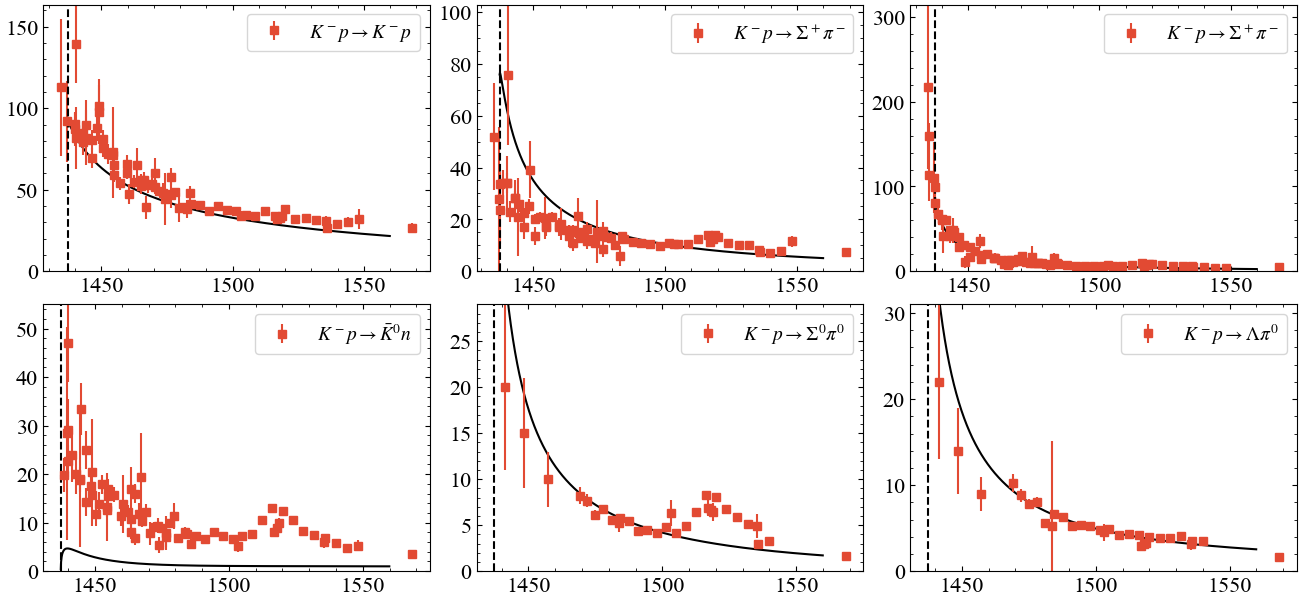

In [56]:
fig, ax = PyPlot.subplots(2, 3, layout="constrained", figsize=(13, 6))

ax[1, 1].plot(w, sc11, c="k")
ax[1, 2].plot(w, sc21, c="k")
ax[1, 3].plot(w, sc51, c="k")


ax[2, 1].plot(w, sc41, c="k")
ax[2, 2].plot(w, sc31, c="k")
ax[2, 3].plot(w, sc61, c="k")


plot_cross_section(ax[1, 1], Kmp_to_Kmp, label=L"K^- p \to K^- p") # 11
plot_cross_section(ax[1, 2], Kmp_to_Sigppim, label=L"K^- p \to \Sigma^+\pi^-") # 12
plot_cross_section(ax[1, 3], Kmp_to_Sigmpip, label=L"K^- p \to \Sigma^+\pi^-") # 15

plot_cross_section(ax[2, 1], Kmp_to_Kbar0n, label=L"K^- p \to \bar{K}^0 n") # 14
plot_cross_section(ax[2, 2], Kmp_to_Sig0pi0, label=L"K^- p \to \Sigma^0 \pi^0") # 13
plot_cross_section(ax[2, 3], Kmp_to_Lampi0, label=L"K^- p \to \Lambda\pi^0") # 16



gcf()

In [57]:
d = val[1:4]
lam = val[5]
anlo = Tuple(subtraction_cons(par_phy_channel[:mch][i], mu, lam) for i in 1:6)
LL = lec_di(d)

6×6 Matrix{Float64}:
 -0.000867675   0.000742503   0.00053956   …   0.000336617   0.000448071
  0.000742503  -0.000867675   0.000336617      0.000673234   0.0
  0.00053956    0.000336617  -0.000531058      0.000336617   0.0
 -0.000236522   0.000336617   0.00053956       0.000742503   0.000448071
  0.000336617   0.000673234   0.000336617     -0.000867675   0.0
  0.000448071   0.0           0.0          …   0.0          -0.00109279

In [58]:
w = mKbarn:0.1:1560e0
sc1 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LL, anlo, :ch11), w);
sc2 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LL, anlo, :ch12), w);
sc3 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LL, anlo, :ch13), w);
sc4 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LL, anlo, :ch14), w);
sc5 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LL, anlo, :ch15), w);
sc6 = map(x -> dist_up_to_nlo_swave(x, par_phy_channel, CC, DD, LL, anlo, :ch16), w);

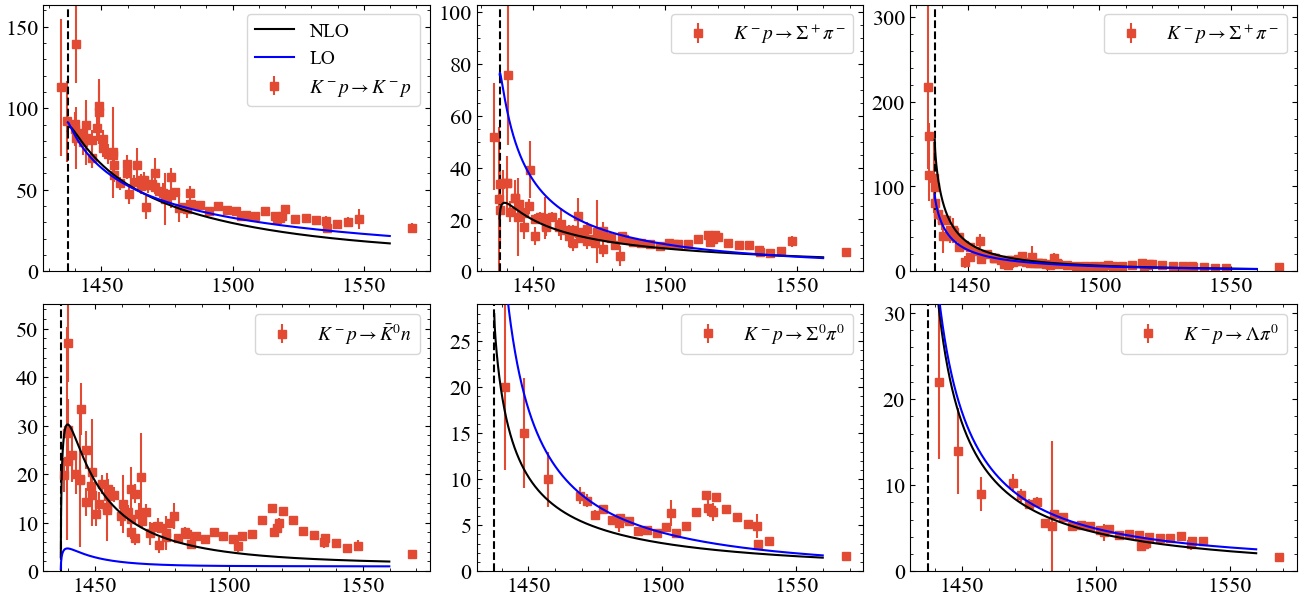

In [59]:
fig, ax = PyPlot.subplots(2, 3, layout="constrained", figsize=(13, 6))
plot_cross_section(ax[1, 1], Kmp_to_Kmp, label=L"K^- p \to K^- p") # 11
plot_cross_section(ax[1, 2], Kmp_to_Sigppim, label=L"K^- p \to \Sigma^+\pi^-") # 12
plot_cross_section(ax[1, 3], Kmp_to_Sigmpip, label=L"K^- p \to \Sigma^+\pi^-") # 15

plot_cross_section(ax[2, 1], Kmp_to_Kbar0n, label=L"K^- p \to \bar{K}^0 n") # 14
plot_cross_section(ax[2, 2], Kmp_to_Sig0pi0, label=L"K^- p \to \Sigma^0 \pi^0") # 13
plot_cross_section(ax[2, 3], Kmp_to_Lampi0, label=L"K^- p \to \Lambda\pi^0") # 16

zr = 5
ax[1, 1].plot(w, sc1, c="k", zorder=zr, label="NLO")
ax[1, 2].plot(w, sc2, c="k", zorder=zr)
ax[1, 3].plot(w, sc5, c="k", zorder=zr)


ax[2, 1].plot(w, sc4, c="k", zorder=zr)
ax[2, 2].plot(w, sc3, c="k", zorder=zr)
ax[2, 3].plot(w, sc6, c="k", zorder=zr)

ax[1, 1].plot(w, sc11, c="b", label="LO", zorder=zr)
ax[1, 2].plot(w, sc21, c="b", zorder=zr)
ax[1, 3].plot(w, sc51, c="b", zorder=zr)


ax[2, 1].plot(w, sc41, c="b", zorder=zr)
ax[2, 2].plot(w, sc31, c="b", zorder=zr)
ax[2, 3].plot(w, sc61, c="b", zorder=zr)

ax[1, 1].legend()
gcf()

In [60]:
map(x -> 16π^2*x - 1, [-1.45e-3, -12.7e-3, -0.11e-3, -1.49e-3, 1e-3, 23.1e-3])

6-element Vector{Float64}:
 -1.2289748221052732
 -3.0055036143013574
 -1.0173705037459173
 -1.2352913689219702
 -0.8420863295825702
  2.6478057866426266